<a href="https://colab.research.google.com/github/Cerasela-b/ml-product-category-classifier/blob/main/notebook/category_classifier_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading and Inspecting the Dataset

In order to understand the data we need to explore its structure.

In this step, we will:

- Load the CSV file from the available source GitHub

- Check how many rows and columns the dataset contains

- Display the first few rows to get an initial view of the data

- Review the data types and basic metadata for each column

In [2]:
import pandas as pd

# load dataset from GitHub
url = "https://raw.githubusercontent.com/Cerasela-b/ml-product-category-classifier/main/data/products.csv"
df = pd.read_csv(url)

# Print shape (number of rows and columns)
print("Dataset shape (rows, columns):", df.shape)

print("\nFirst 5 rows:")
print(df.head())

# Show column data types and non-null counts
print("\nDataset info:")
df.info()

Dataset shape (rows, columns): (35311, 8)

First 5 rows:
   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

   Category Label _Product Code  Number_of_Views  Merchant Rating  \
0   Mobile Phones    QA-2276-XC            860.0              2.5   
1   Mobile Phones    KA-2501-QO           3772.0              4.8   
2   Mobile Phones    FP-8086-IE           3092.0              3.9   
3   Mobile Phones    YI-0086-US            466.0              3.4   
4   Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0       5/10/2024  
1

### Observations

Here we see inconsisteny of column names, wee need to change that. We will have all column names written with upper first letter and we will remove `_` and spaces.


## Missing Values Check

Checking for missing values is essential because they can bias results or reduce model performance.

We will:

- Identify missing values – count missing entries per column.

- Analyze patterns – check if missingness is random or systematic.

- Decide handling strategy – impute, remove, or use models that handle missing data.
- Visualize missing values using a heatmap

Proper handling of missing values ensures reliable analysis and accurate conclusions.

In [3]:

# Count missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
product ID           0
Product Title      172
Merchant ID          0
 Category Label     44
_Product Code       95
Number_of_Views     14
Merchant Rating    170
 Listing Date       59
dtype: int64


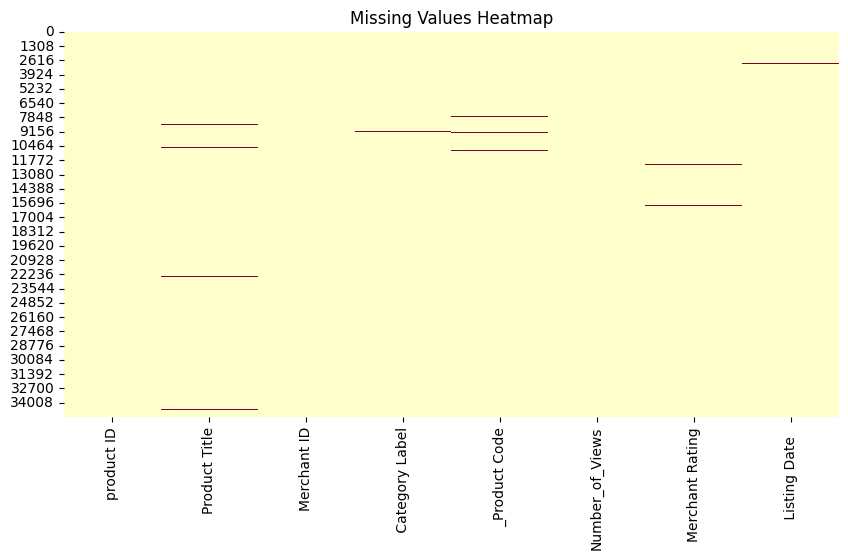

In [4]:
# Visualize missing data with seaborn heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(df.isna(), cbar=False, cmap ="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()


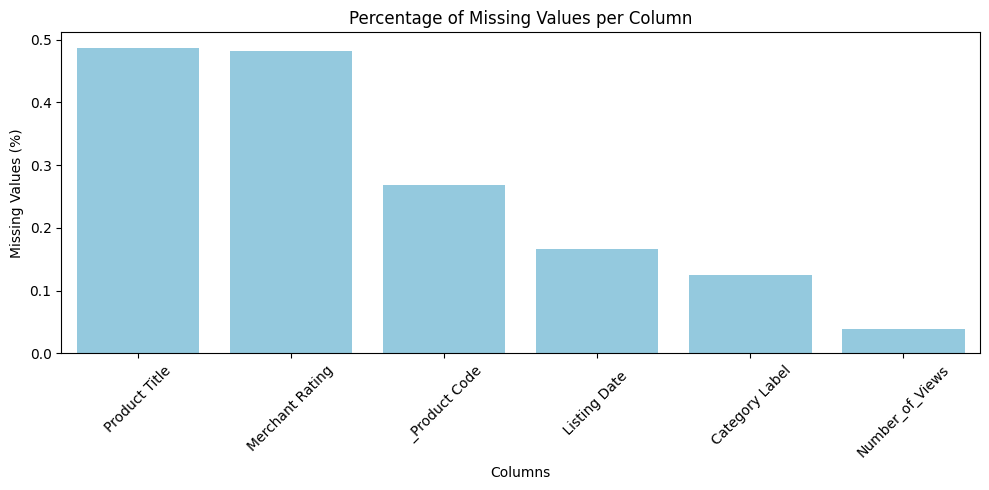

In [5]:
# Visualize missing data per column using barplot
missing_percent = df.isna().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=missing_percent.index, y=missing_percent.values, color="skyblue")
plt.xlabel("Columns")
plt.ylabel("Missing Values (%)")
plt.title("Percentage of Missing Values per Column")
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

## Category analysis

In this step we will analize which category we have and if there are any inconsistensies in the category type


In [6]:
# Count occurrences of each category label
category_counts = df[' Category Label'].value_counts()

# Print counts
print("Category distribution (counts):")
print(category_counts)

Category distribution (counts):
 Category Label
Fridge Freezers     5495
Washing Machines    4036
Mobile Phones       4020
CPUs                3771
TVs                 3564
Fridges             3457
Dishwashers         3418
Digital Cameras     2696
Microwaves          2338
Freezers            2210
fridge               123
CPU                   84
Mobile Phone          55
Name: count, dtype: int64
